In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")   # "filterwarnings("ignore")" is use to ignore the warnings between the data

In [2]:
df=pd.read_csv("hotel_bookings 2 (1).csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. Conver the date (object) to (date/time)

### Use of to_datetime( ) Function

In [5]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

* "pd.to_datetime()" is pandas function use to change the datatype of column to "datetime64"

In [6]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


# Now to access all the values of the object for the research

### Use of the unique( ) Function

In [7]:
for i in df.describe(include="object").columns:
    print(i)
    print(df[i].unique())                           # hotel.unique().......reservation_status.unique()
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

* "unique()" Function is use to provide the unique values of the columns

# Now check the missing Value

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Now we have to Delete the "agent" and "Company" column

In [9]:
df.drop(["company","agent"],axis=1,inplace=True)
df.dropna(inplace=True)

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


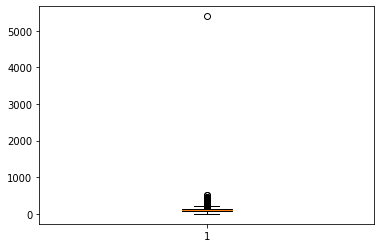

In [11]:
plt.boxplot(df.adr)
plt.show()

* As we can see here the single max value is outlier so we have to remove the outlier

In [12]:
df=df[df["adr"]<5000]

* "adr" above 5000 value is now deleted

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
cancel_per=df["is_canceled"].value_counts(normalize=True)
cancel_per

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

In [15]:
resort_cancel=df[df["hotel"]=="Resort Hotel"]
resort_cancel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

* "value_count()" is use to count the total no of values present in the column
* "normalize" argument is use to provide the float value between 0 to 1 by taking the bool value

In [16]:
c_p=df["is_canceled"].value_counts()
c_p

0    74745
1    44152
Name: is_canceled, dtype: int64

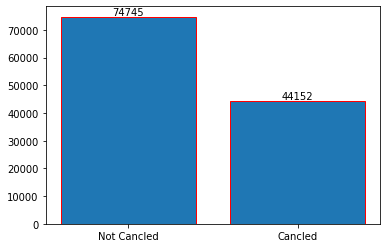

In [17]:
plt.bar(["Not Cancled","Cancled"],df["is_canceled"].value_counts(),edgecolor="r")
for i in range(len(c_p)):
    plt.text(i,c_p[i],c_p[i],ha="center",va="bottom")      
plt.show()

* text() function is to gave the text to the chart
* (x,y,text,ha,va) arguments is use ha ="center" , va ="bottom"

<IPython.core.display.Javascript object>

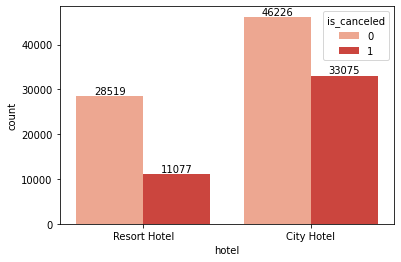

In [18]:
g=sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Reds")
for i in g.containers:
    g.bar_label(i)

* "sns.countplot()" Function takes the bar value
* "x" argument takes the x value for the bar
* "hue" argument takes the labels for the bar
* "data" argument takes the bar data as also said the height
* "palette" argument takes the froup of single color as (Blues,Reds,etc) (optional)
* "containers" function is use to take the values 
* "bar_label()" Function is use to gave the bar label  

# Calculate the Adr mean of the City and Resort Hotel

In [19]:
city_cancel=df[df["hotel"]=="City Hotel"]
city_cancel["is_canceled"].value_counts(normalize=True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

In [20]:
resort_cancel=resort_cancel.groupby("reservation_status_date")[["adr"]].mean()
resort_cancel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-05,115.363333
2015-01-06,133.677143
2015-01-07,82.485455
...,...
2017-12-05,103.287534
2017-12-06,159.808929
2017-12-07,160.306275


In [21]:
city_cancel=city_cancel.groupby("reservation_status_date")[["adr"]].mean()
city_cancel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-05,58.900000
2015-01-06,69.216667
2015-01-07,82.877500
...,...
2017-12-04,128.755465
2017-12-05,124.544536
2017-12-06,132.725882


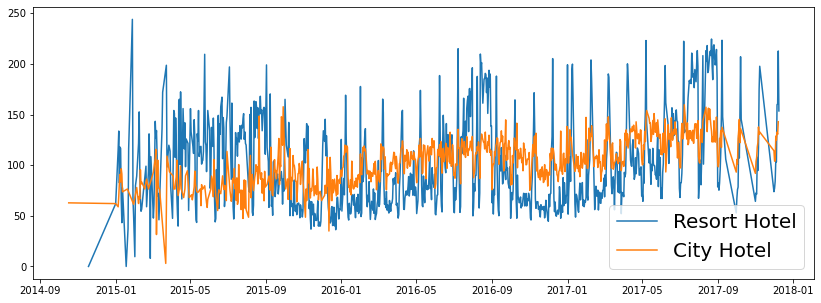

In [22]:
plt.figure(figsize=(14,5))
plt.plot(resort_cancel.index,resort_cancel,label="Resort Hotel")
plt.plot(city_cancel.index,city_cancel,label="City Hotel")
plt.legend(loc="lower right",fontsize=20)
plt.show()

# Find the months data of the cancilation combined

In [23]:
df["month"]=df["reservation_status_date"].dt.month

<IPython.core.display.Javascript object>

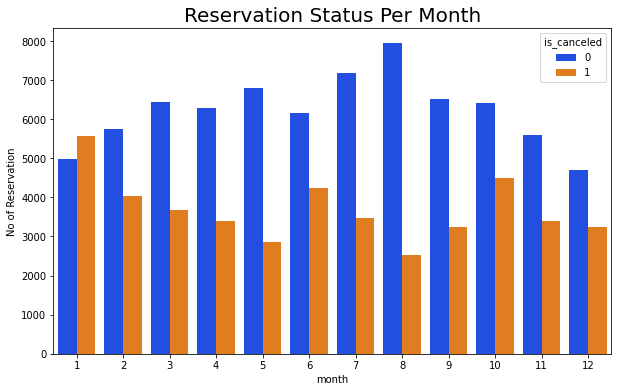

In [24]:
plt.figure(figsize=(10,6))
mo=sns.countplot(x="month",data=df,hue="is_canceled",palette="bright")
plt.title("Reservation Status Per Month",fontsize=20)
plt.ylabel("No of Reservation")
plt.show()

* As we can see here jan has the Highest cancelation and Aug has the lowest cancelation, so find the reason about that

In [25]:
total_cancel=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index()
total_cancel

,month,adr
0,1,532660.54
1,2,399081.98
2,3,419319.79
3,4,399361.20
4,5,343229.69
5,6,468827.36
6,7,387597.85
7,8,296665.40
8,9,340233.39
9,10,384742.47


<IPython.core.display.Javascript object>

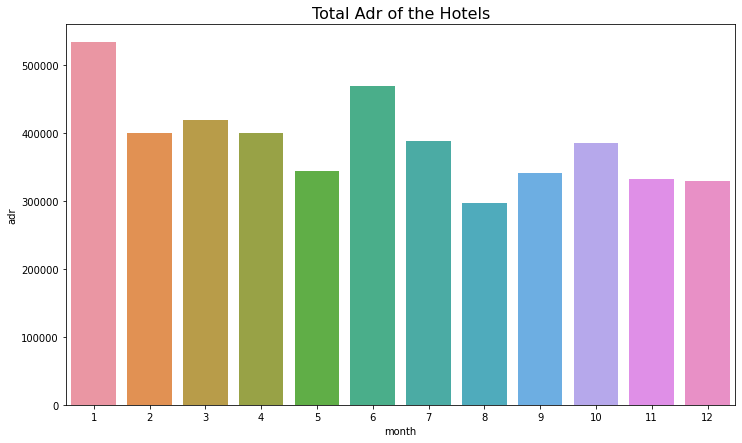

In [26]:
plt.figure(figsize=(12,7))
sns.barplot(x="month",y="adr",data=total_cancel)
plt.title("Total Adr of the Hotels",fontsize=16)
plt.show()

* So as we can see here the reason for the cancelation on jan is due to the high price
* The less Cancelation in the August is due to the low price.

# Find Top 10 Countries which have the highest Cancelation

In [27]:
top_cancel=df[df["is_canceled"]==1].groupby("country")[["is_canceled"]].sum()
top_cancel=top_cancel.sort_values("is_canceled",ascending=False).head(10).reset_index()
top_cancel

,country,is_canceled
0,PRT,27514
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


# ORR

In [28]:
top_cancel=df[df["is_canceled"]==1]                          # better
top_cancel=top_cancel["country"].value_counts()[:10]
top_cancel

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

* "[:10]" gave the slicing value of 10
* "value_counts()" function already change the value in ascending order

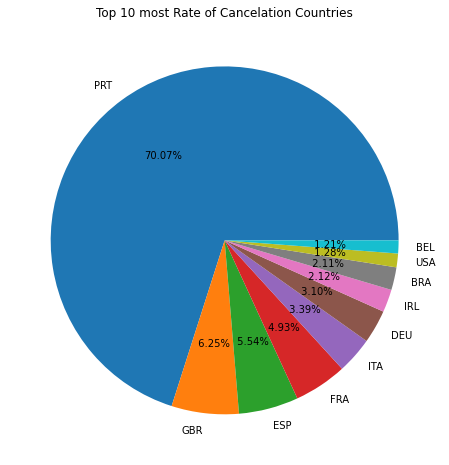

In [29]:
plt.figure(figsize=(8,8))
plt.title("Top 10 most Rate of Cancelation Countries")
plt.pie(top_cancel,labels=top_cancel.index,autopct="%5.2f%%")
plt.show()

* Form here you have to improve the Facility of the portugal hotel indusry

# Find the reasons behing the Portugal have large Cancel Rate

In [30]:
ard_con=df[(df["country"]=="PRT") | (df["country"]=="GBR")]
ard_con

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-03-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119367,City Hotel,0,212,2017,August,35,28,2,5,2,...,0,No Deposit,0,Transient,85.59,0,0,Check-Out,2017-04-09,4
119369,City Hotel,0,207,2017,August,34,25,3,7,2,...,0,No Deposit,0,Transient,96.25,0,2,Check-Out,2017-04-09,4
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,0,No Deposit,0,Transient,86.85,0,0,Check-Out,2017-04-09,4
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,0,No Deposit,0,Transient,155.00,0,1,Check-Out,2017-04-09,4


<IPython.core.display.Javascript object>

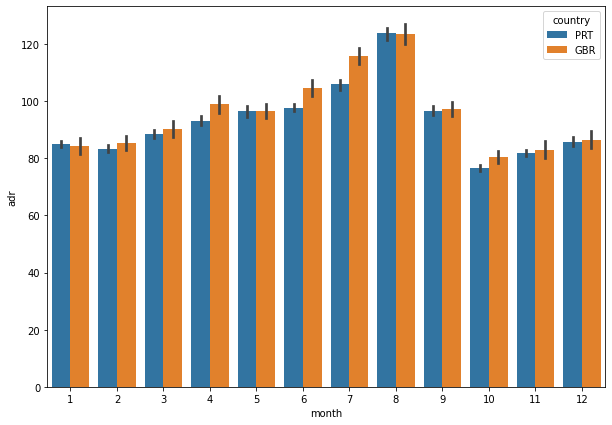

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x="month",y="adr",hue="country",data=ard_con)
plt.show()

* As we can see here the amd price of United Kingdom is Similar than the Portugal but still the Cancelation rate of Portugal is high, So we can say that the Facilities or the Retention rate of the Portugal Hotel is very less as Compared to The other Countries.

# Check for Offline or Online

In [32]:
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [33]:
df["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [34]:
df["market_segment"].value_counts(normalize=True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

<IPython.core.display.Javascript object>

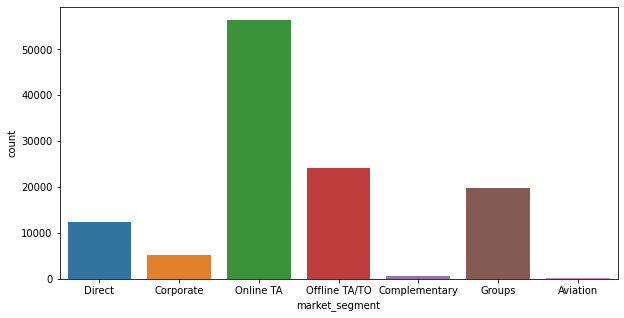

In [35]:
plt.figure(figsize=(10,5))
co=sns.countplot(x="market_segment",data=df)
plt.show()

* As we can see here that most of the customers are comming from the online portal about 47% of Reservation

# Now Check for the no of Cancelation in the Online Portal

In [36]:
can_on=df[df["is_canceled"]==1]
per_on=can_on["market_segment"].value_counts(normalize=True)*100
per_on

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

<IPython.core.display.Javascript object>

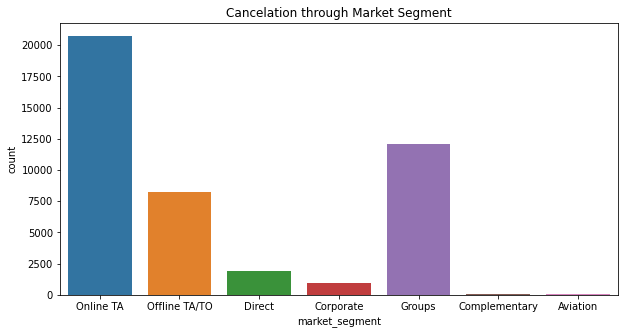

In [37]:
plt.figure(figsize=(10,5))
plt.title('Cancelation through Market Segment')
c_on=sns.countplot(x="market_segment",data=can_on)
plt.show()

* Most reservation are from Online but still the Online has the most cancelation about 47%
* Group is the 2nd most cancelation about 27%

# Check the Avg price of the Canceled and Non Canceled

In [38]:
canceled=df[df["is_canceled"]==1].groupby("reservation_status_date")[["adr"]].mean().reset_index()
non_canceled=df[df["is_canceled"]==0].groupby("reservation_status_date")[["adr"]].mean().reset_index()

# Now Range it from 2016 to 2017-09

canceled=canceled[(canceled["reservation_status_date"]>"2016") & (canceled["reservation_status_date"]<"2017-09")]
non_canceled=non_canceled[(non_canceled["reservation_status_date"]>"2016") & (non_canceled["reservation_status_date"]<"2017-09")]

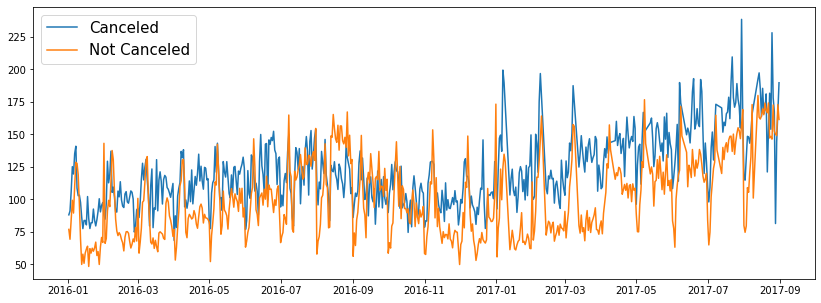

In [39]:
plt.figure(figsize=(14,5))
plt.plot(canceled.reservation_status_date,canceled.adr,label="Canceled")
plt.plot(non_canceled.reservation_status_date,non_canceled.adr,label="Not Canceled")
plt.legend(loc="upper left",fontsize=15)
plt.show()

* Here as we can see the Cancel Average Pricing is more than the avg Pricing of the non Cancel, So Pricing of the Hotel is also a big Point for the Large Cancelation